In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_1_imputed.csv", index_col=0)

In [13]:
print(base_df)

     score         salary  happiness   Age        pca-one    pca-two  \
0     80.0  141890.771857       61.0  62.0   24268.102057 -19.413406   
1     47.0  130053.860492       80.0  71.0   12431.193782   4.540971   
2     56.0  102071.794659       40.0  67.0  -15550.886689 -12.638129   
3     37.0   90975.540309       21.0  27.0  -26647.158617   2.018015   
4     70.0  109558.368794       41.0  77.0   -8064.308374 -22.460848   
..     ...            ...        ...   ...            ...        ...   
975    7.0  117026.617736       41.0  63.0    -596.087851  43.096121   
976   26.0   89572.041893       40.0  22.0  -28050.648292   9.091105   
977   50.0  120695.809039       41.0  40.0    3073.119794   1.719029   
978   42.0  297158.567626       81.0  79.0  179535.847063  94.828724   
979   51.0  122615.655631       60.0  34.0    4992.979015  -1.398559   

     pca-three   pca-four  
0   -12.332575   9.368605  
1   -21.027297 -21.530617  
2   -17.560669   2.357581  
3    22.970192  10.9805

In [15]:
model = pca(n_components=4, normalize=True)
results = model.fit_transform(base_df)
print(results['explained_var'])
results['loadings']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[0.58290828 0.83306551 0.96919521 1.        ]


,score,salary,happiness,Age
PC1,0.504326,0.610275,0.610751,0.014224
PC2,-0.045415,0.008576,0.005668,0.998915
PC3,-0.862314,0.358755,0.354610,-0.044297
PC4,0.002790,0.706248,-0.707957,-0.001920


The first PC focuses on the combination of score, salary and happiness, while the second PC focuses only on the age.

The first PC explains 58.29% of the variance, while the first and second PC together explain 83.31% of the variance, i.e. the second PC alone explains 83.31-58.29 = 25.02% of the variance. The third PC adds another 13.61%, and the fourth PC adds another 3.08%.

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


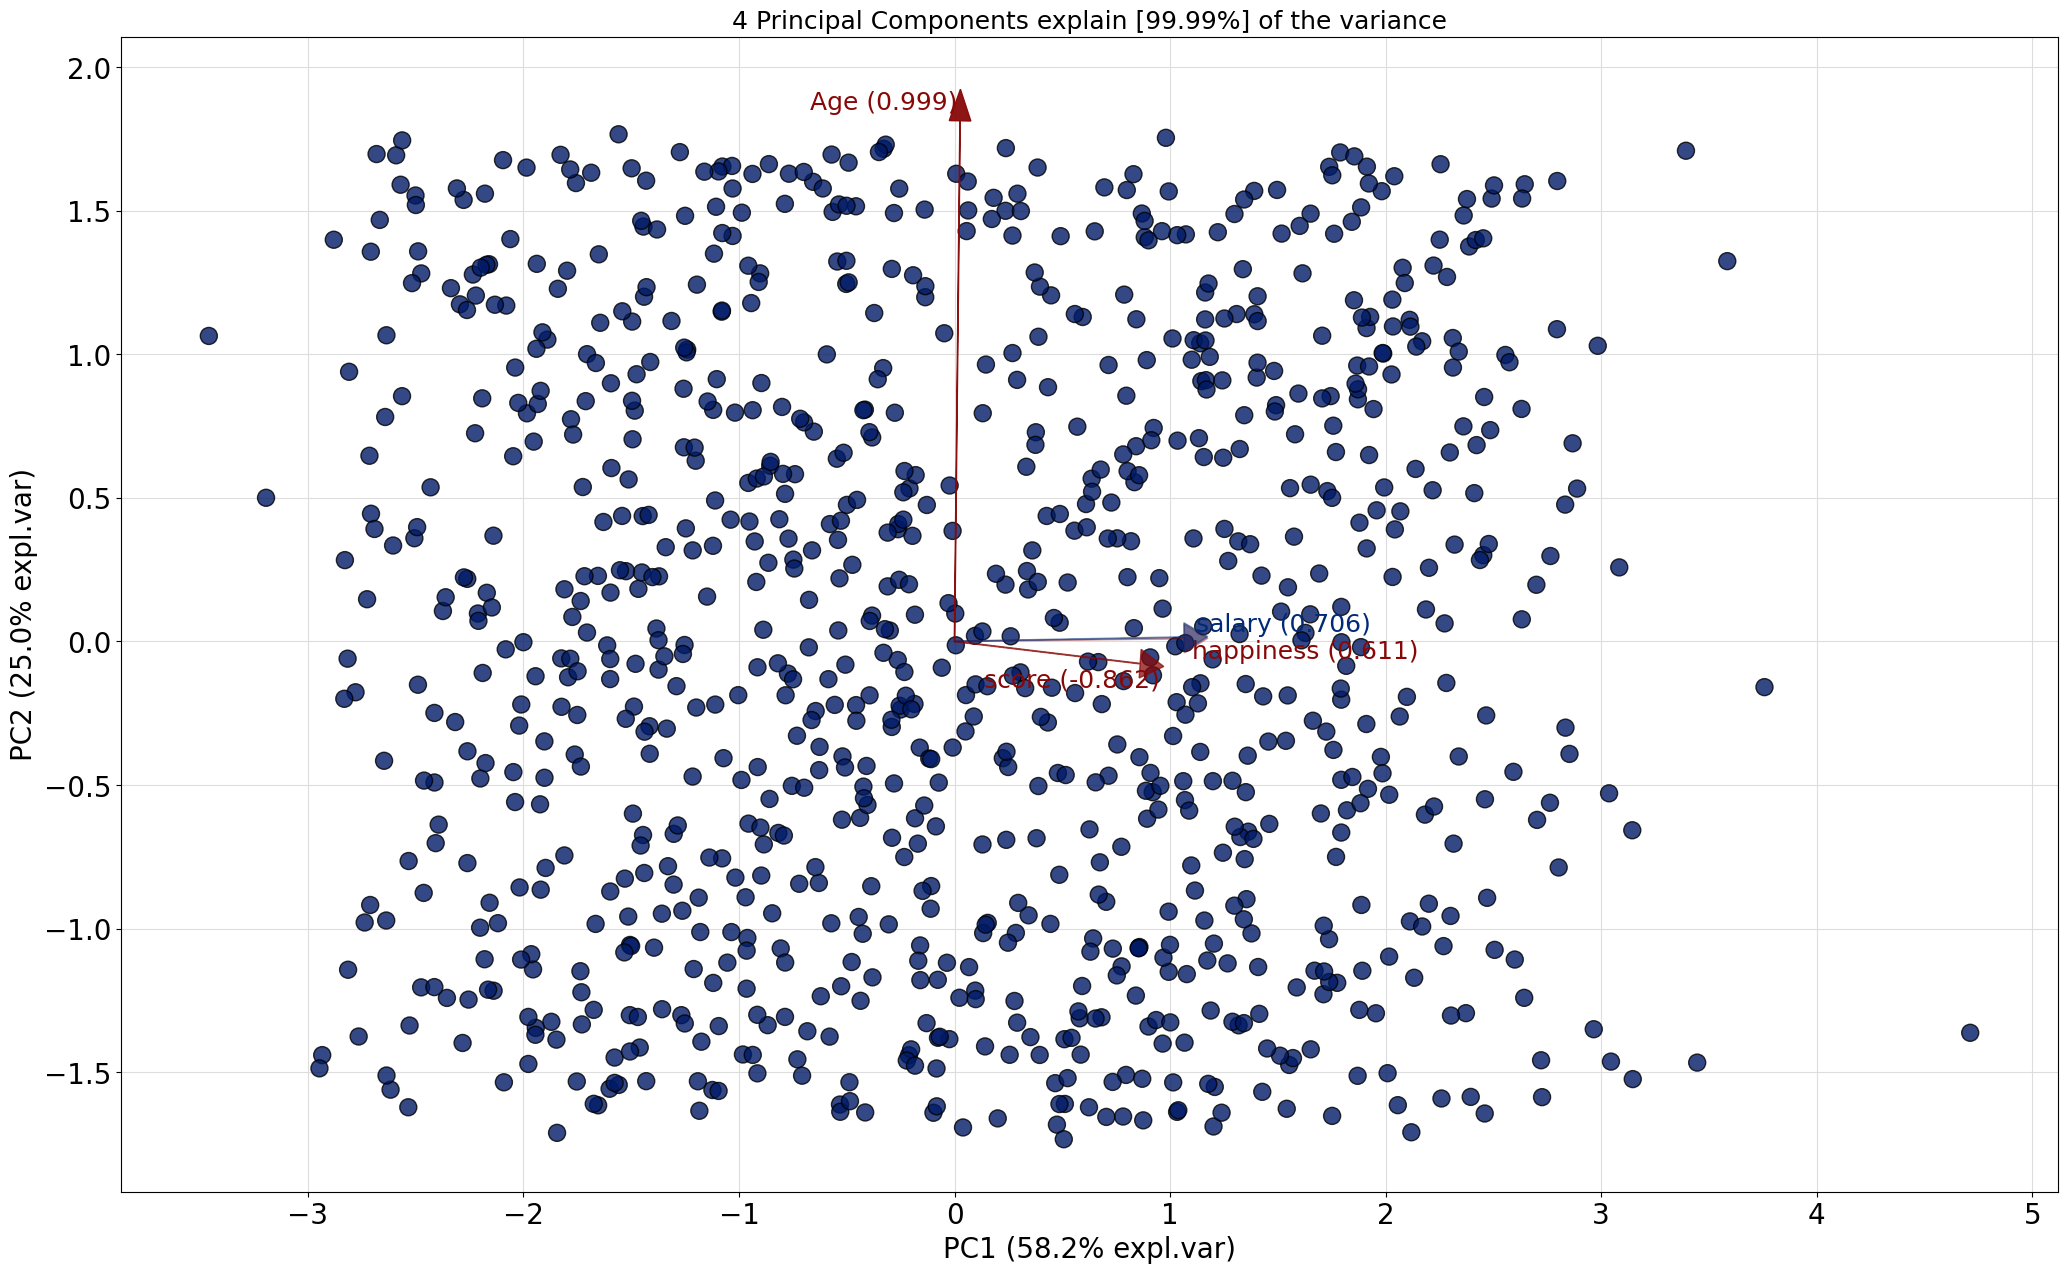

In [4]:
# Visualize the results via a biplot
fig, ax = model.biplot(n_feat=10, legend=False)
plt.show()

# t-SNE

/tmp/ipykernel_13616/1769301485.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette=sns.color_palette("hsv", 10))


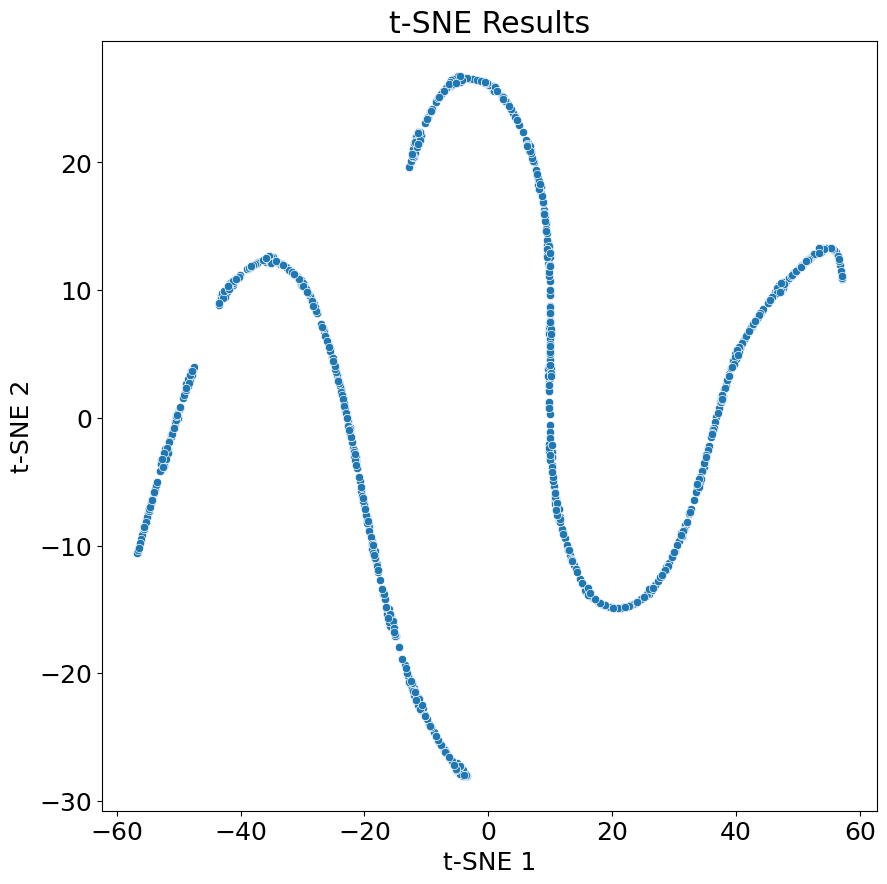

In [24]:
from sklearn.manifold import TSNE

# Perform t-SNE on the data
tsne = TSNE(n_components=2, random_state=SEED)
tsne_results = tsne.fit_transform(base_df)

# Visualize the t-SNE results
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette=sns.color_palette("hsv", 10))
plt.title("t-SNE Results")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


t-SNE seems to be overkill for our four-dimensional dataset.